# IBM HR Analytics Employee Attrition & Performance

***
## Udacity - Project: Writing a Data Scientist Blog Post


In this project, we are going to explore a HR Employee Attrition dataset that is related to employee turnover in a company to answer some questions and examine the trends to give more business insights. 
Some business questions we are going to answer are:
- What factors are contributing more to employee attrition?
- What is the age range of the employees who left the company?
- Which Department has the most Attrition Rate?


dataset: https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset

- Import libraries and read file

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')

- Exploratory Data Analysis (EDA)

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


The dataset is composed of 35 columns and 1470 rows. It clearly shows that there are no null values in the dataset. Also the method describe() shows some valuable information such as the youngest employee is 18 years old and the oldest is 60 years old. Also the monthly average income for the employees is 6502. The Education mean is 2.9 and this indicates that most employees has College/Bachelor degrees. Environment Satisfaction average is 2.7 ( 2 = 'Medium, 3 = 'High' ).


### What is the Attrition Rate?

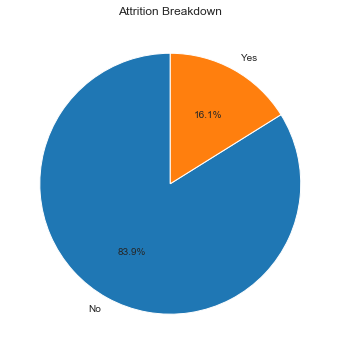

In [7]:
attrition_counts = df["Attrition"].value_counts()
# print(attrition_counts)

plt.figure(figsize=(6, 6))
plt.pie(attrition_counts, labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Attrition Breakdown")

plt.show()

There are 1233 "No" and 237 "Yes" responses among 1470 observations. The attrition rate is 237/1470 = 16.1%

### What is the gender count by Attrition?

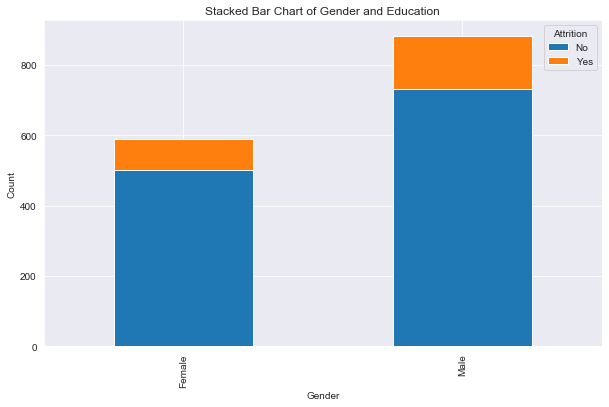

In [8]:
grouped_gender = df.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)

ax = grouped_gender.plot(kind='bar', stacked=True, figsize=(10, 6))

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Chart of Gender and Education')

plt.legend(title='Attrition')

plt.show()

Male attrition is more than Female attrition.

In [9]:
# Devide dataframe by Attrition
attrition_yes = df[df['Attrition'] == 'Yes']
attrition_no = df[df['Attrition'] == 'No']

In [10]:
def bar_plot(column, title, xlabel, ylabel):
    
    """
    Generate a bar plot for employees who left the company based on the given data and attributes.

    Input:
    column (str): The column from the data to be visualized on the x-axis of the bar plot.
    title (str): The title of the bar plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.

    Output:
    A bar chart

    Example:
    >>> data = df['SomeColumn']
    >>> plot_bar_chart(data, 'SomeColumn', 'Bar Chart Title', 'X-axis Label', 'Y-axis Label')
    """
    
    plt.hist(attrition_yes[column], bins=10, edgecolor='black', alpha=0.7)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.show()

### What is the age range of the employees who left the company?

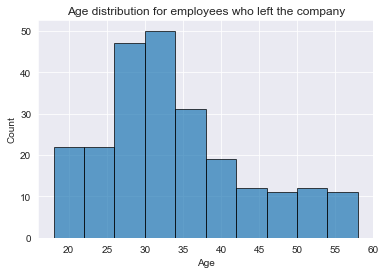

In [11]:
bar_plot("Age", "Age distribution for employees who left the company", "Age", "Count")

Employees leave the company at a much younger age, between the ages of 25 and 38. This makes sense since people at this age are still exploring.

### Can the office location affect the employees?

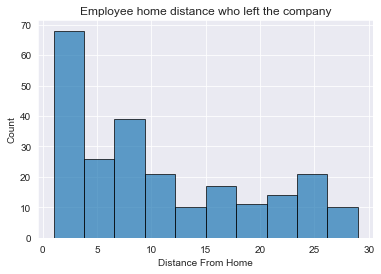

In [12]:
bar_plot("DistanceFromHome", "Employee home distance who left the company", "Distance From Home", "Count")

Aperantly office location is not affecting employees to leave the company. Most of the employees stay closer to the office location yet they leave the company.

In [13]:
def bar_plot_by_category(column, title, xlabel, ylabel):
    
    """
    Generate a bar plot for employees who left the company based on a certain category.

    Input:
    column (str): The category from the data to be visualized on the x-axis of the bar plot.
    title (str): The title of the bar plot.
    xlabel (str): The label for the x-axis.
    ylabel (str): The label for the y-axis.

    Output:
    A bar chart
    
    """
    
    category_counts = attrition_yes[column].value_counts()
#     print(category_counts)

    plt.figure(figsize=(10, 6))
    category_counts.plot(kind='bar')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()

### What is the count of employee in each department ?

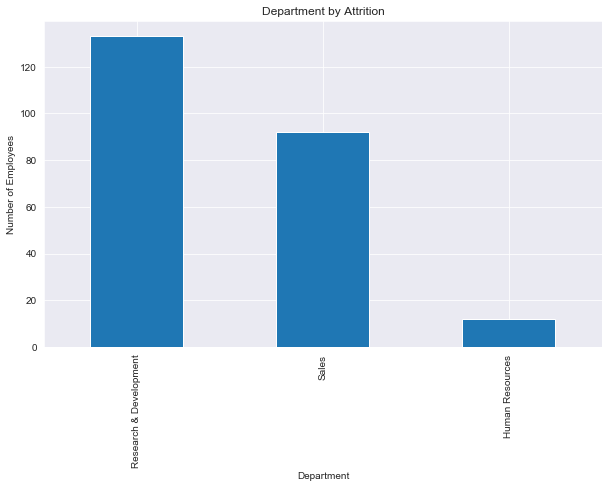

In [14]:
bar_plot_by_category('Department', 'Department by Attrition', 'Department', 'Number of Employees')

Research & Development department has 133 attrition employees, the Sales department has 92 attrition employees,
and the remaining 12 are from the HR department.

### What is the education of employee who left the company ?

In [15]:
# Map the values for better presentation: 
education_mapping = {1:'Below College', 2: 'College', 3:'Bachelor', 4: 'Master', 5: 'Doctor'}

# Use the map function to apply the mapping
attrition_yes['Education'] = attrition_yes['Education'].map(education_mapping)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


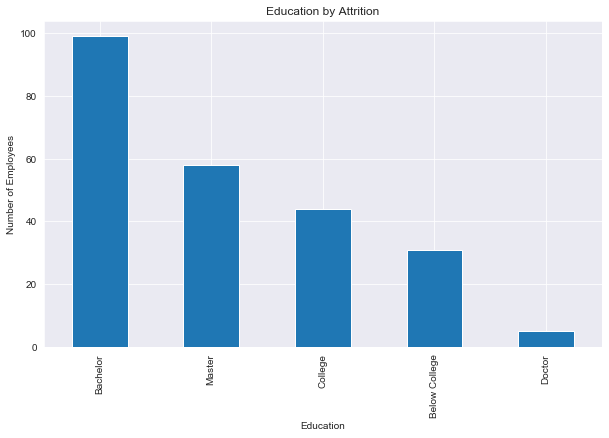

In [16]:
bar_plot_by_category('Education', 'Education by Attrition', 'Education', 'Number of Employees')

### How is the Environment Satisfaction of the employees who left the company ?

In [17]:
# Map the values for better presentation: 
EnvironmentSatisfaction_mapping = { 1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}

# Use the map function to apply the mapping
attrition_yes['EnvironmentSatisfaction'] = attrition_yes['EnvironmentSatisfaction'].map(EnvironmentSatisfaction_mapping)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


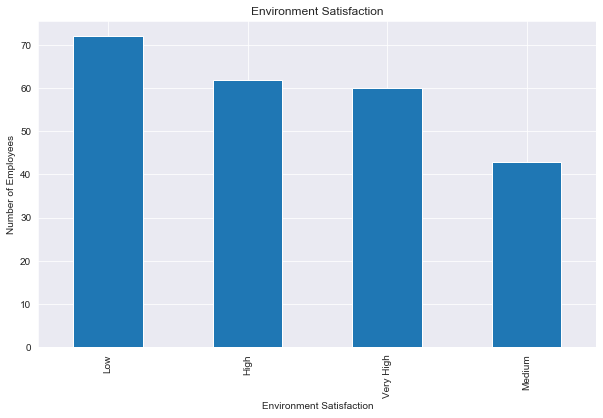

In [18]:
bar_plot_by_category('EnvironmentSatisfaction', 'Environment Satisfaction', 'Environment Satisfaction', 'Number of Employees')

The distribution plot clearly shows that employees with ‘Low’ Environment Satisfaction resign more.

### Correlation Matrix

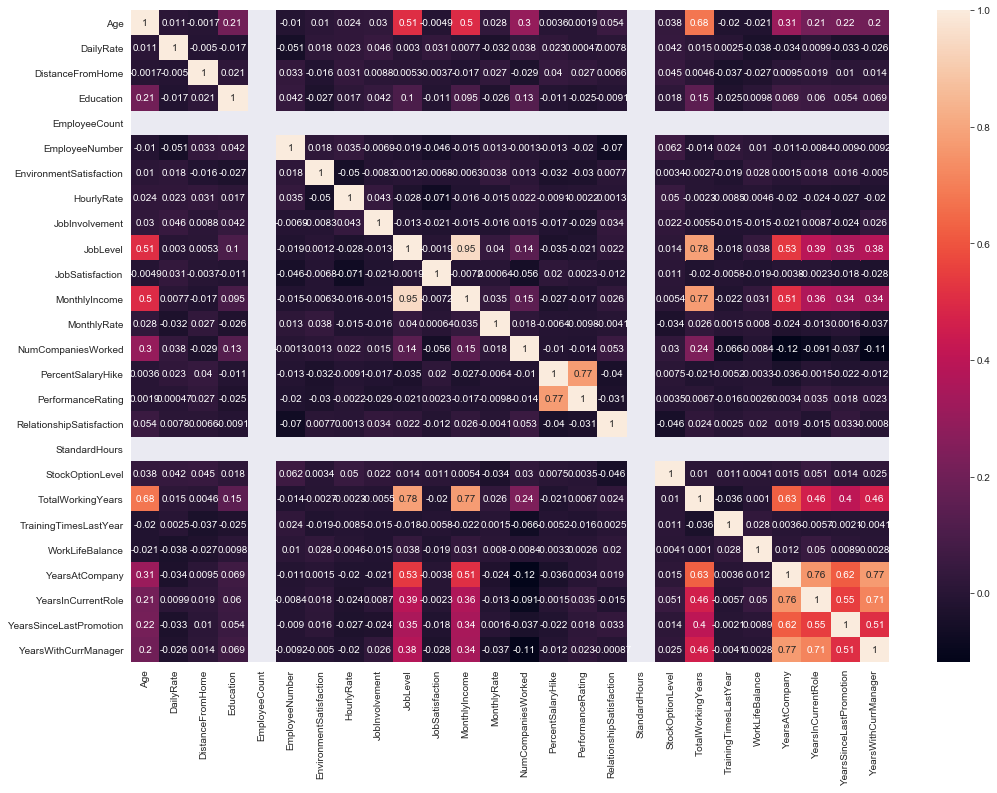

In [19]:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(), annot=True)

- Monthly income is highly correlated with Job level.
- Job level is highly correlated with total working hours.
- Monthly income is highly correlated with total working hours.
- Age is positively correlated with the Total working hours.
- Percent salary hike is highly correlated with performance rating
- Years at company is negatively correlated with number of companies worked.